In [1]:
import os
import shutil
import numpy as np
from subprocess import call
import sys
sys.path.insert(0, './src/')
from src import util
import IPython.display as ipd
import json
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import random
import csv
experimental_conditions = [750, 500, 250]
data_dir = "/vol/tensusers3/camghane/ASR/LibriSpeech_train_clean_360/data/train-clean-360/normalized"


copy_subsets = False
merge_files = False

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.5.0'

## Copy Subsets of LibriSpeech 360

In [4]:
def cp_dir(source, target):
    call(['cp', '-a', source, target]) # Linux

In [5]:
if copy_subsets:
    speakers = np.array(os.listdir(data_dir))
    for nr_speakers in experimental_conditions:

        new_data_dir = "/vol/tensusers3/camghane/ASR/jdy/data/trainset{}/normalized".format(nr_speakers)

        if not os.path.exists(new_data_dir):
            os.makedirs(new_data_dir)

        speakers_subset = speakers[np.random.choice(len(speakers), size=nr_speakers, replace=False)]

        for speaker_id in speakers_subset:
            source_loc = data_dir + "/{}".format(speaker_id)
            target_loc = new_data_dir + "/{}".format(speaker_id)
            cp_dir(source_loc, target_loc)


## Merging Files for smallest Dataset

In [6]:

if merge_files:
    max_nr_of_speakers = 10

    for nr_speakers in experimental_conditions:
        data_dir = "/vol/tensusers3/camghane/ASR/jdy/data/trainset{}/normalized/".format(nr_speakers)
        new_dir = "/vol/tensusers3/camghane/ASR/jdy/data/trainset{}/merged/".format(nr_speakers)
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)
        util.merge_audiofiles(data_dir, new_dir, max_nr_of_speakers)

## Move Files for Larger Datasets

For the 500 and 750 speaker dataset, files per speaker need to be moved, such that in the end, all three datasets are of equal size

In [7]:
# data_dir = '/vol/tensusers3/camghane/ASR/jdy/data/trainset750/normalized/'
# for base, dirs, files in os.walk(data_dir):
#     speaker_files = []
#     for f in files:
#         sid = f.split("_")[0]
#         #print(f.split("_")[0])
# #         print(data_dir+sid+"/"+f)
#         speaker_files.append(data_dir+sid+"/"+f)
#     print(len(speaker_files))
# #     speaker_files = np.array(speaker_files)
# #     random = speaker_files[np.random.choice(len(speaker_files), size=int(len(speaker_files)/3), replace=False)]
# #     print(len(random))
    
# #     for source_path in random:
# #         new_filepath = source_path.replace('normalized', 'backup')
# #         filename = new_filepath.split("/")[-1]
# #         new_path = new_filepath.replace(filename, "")
# #         if not os.path.exists(new_path):
# #             os.makedirs(new_path)
# #         shutil.move(source_path, new_filepath)
#     print("----")
        

## Counting Size per Class

In [8]:
data_dir = "/vol/tensusers3/camghane/ASR/jdy/data/trainset250/merged/train/"
set500 = "/vol/tensusers3/camghane/ASR/jdy/data/trainset500/merged/train/"
set750 = "/vol/tensusers3/camghane/ASR/jdy/data/trainset750/merged/train/"
original_set = "/vol/tensusers3/camghane/ASR/LibriSpeech_train_clean_360/data/train-clean-360/merged/train/"

totalDir = 0
total250 = 0
total500 = 0
total750 = 0

for (base250, dirs250, files250), (base500, dirs500, files500), (base750, dirs750, files750), (base_or, dirs_or, files_or) in zip(os.walk(data_dir), os.walk(set500), os.walk(set750), os.walk(original_set)):
    if not base500.endswith('/'):
        total_or = 0
        totalFiles250 = 0
        totalFiles500 = 0
        totalFiles750 = 0
        #print('Searching in : ',base)
        for Files in files250:
            totalFiles250 += 1
        for Files in files500:
            totalFiles500 +=1
        for Files in files750:
            totalFiles750 +=1
        for Files in files_or:
            total_or += 1
        print("Total Files in Class {} for 250 speakers: {}".format(base250.split('/')[-1], totalFiles250))
        print("Total Files in Class {} for 500 speakers: {}".format(base500.split('/')[-1], totalFiles500))
        print("Total Files in Class {} for 750 speakers: {}".format(base750.split('/')[-1], totalFiles750))
        print("Total Files in Class {} for original set: {}".format(base750.split('/')[-1], total_or))
        print("")
        
        total250 += totalFiles250
        total500 += totalFiles500
        total750 += totalFiles750
        totalDir += total_or
print(total250)
print(total500)
print(total750)
print(totalDir)

Total Files in Class 1 for 250 speakers: 654
Total Files in Class 1 for 500 speakers: 662
Total Files in Class 1 for 750 speakers: 656
Total Files in Class 1 for original set: 2410

Total Files in Class 2 for 250 speakers: 651
Total Files in Class 2 for 500 speakers: 663
Total Files in Class 2 for 750 speakers: 656
Total Files in Class 2 for original set: 2410

Total Files in Class 3 for 250 speakers: 648
Total Files in Class 3 for 500 speakers: 662
Total Files in Class 3 for 750 speakers: 657
Total Files in Class 3 for original set: 2407

Total Files in Class 4 for 250 speakers: 649
Total Files in Class 4 for 500 speakers: 662
Total Files in Class 4 for 750 speakers: 657
Total Files in Class 4 for original set: 2407

Total Files in Class 5 for 250 speakers: 651
Total Files in Class 5 for 500 speakers: 662
Total Files in Class 5 for 750 speakers: 656
Total Files in Class 5 for original set: 2407

Total Files in Class 6 for 250 speakers: 648
Total Files in Class 6 for 500 speakers: 661


## Results

In [26]:
with open('/vol/tensusers3/camghane/ASR/predictions.json') as json_file:
    data = json.load(json_file)
with open('/vol/tensusers3/camghane/ASR/jdy/predictions_250.json') as json_file:
    data250 = json.load(json_file)
with open('/vol/tensusers3/camghane/ASR/jdy/predictions_500.json') as json_file:
    data500 = json.load(json_file)
with open('/vol/tensusers3/camghane/ASR/jdy/predictions_750.json') as json_file:
    data750 = json.load(json_file)

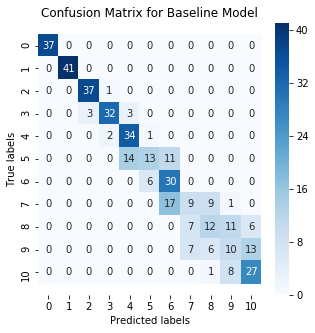

In [27]:
y_true = data['y_true']
y_pred = data['y_pred']

cm_train = confusion_matrix(y_true, y_pred, labels=range(11))

# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,5))



# Plot confusion matrix for training data
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax, cmap="Blues")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Baseline Model')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig("confusion_baseline.png")
plt.show() # ta-da!

# Show the result
# plt.show()

In [28]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("MAE: {}".format(mae(y_true, y_pred)))
print("MAE St.Dev.: {}".format(statistics.stdev(abs(y_true.astype(np.float)-y_pred.astype(np.float)))))
print("Relative MAE: {}".format(np.mean(abs(y_true-y_pred)/ (y_pred+0.00001))))
print("Relative MAE St.Dev.: {}".format(statistics.stdev( abs(y_true-y_pred)/ (y_pred+0.00001) )))

MAE: 0.3471882640586797
MAE St.Dev.: 0.548391736200062
Relative MAE: 0.05568448882503808
Relative MAE St.Dev.: 0.09394000696264884


In [29]:
results = abs(y_true-y_pred)

for r in results:
    with open('results.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow([r, 'baseline'])

In [30]:

with open('results_relative.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow(['abs_error', 'group'])
        
results = abs(y_true-y_pred)/ (y_pred+0.00001)

for r in results:
    with open('results_relative.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow([r, 'baseline'])

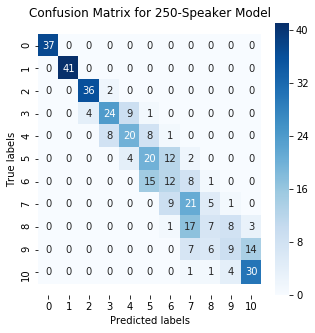

In [31]:
y_true = data250['y_true']
y_pred = data250['y_pred']

cm_train = confusion_matrix(y_true, y_pred, labels=range(11))

# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.set_facecolor('white')


# Plot confusion matrix for training data
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax, cmap="Blues")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for 250-Speaker Model')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig("confusion_250.png")
plt.show() # ta-da!


In [32]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("MAE: {}".format(mae(y_true, y_pred)))
print("MAE St.Dev.: {}".format(statistics.stdev(abs(y_true.astype(np.float)-y_pred.astype(np.float)))))
print("Relative MAE: {}".format(np.mean(abs(y_true-y_pred)/ (y_pred+0.00001))))
print("Relative MAE St.Dev.: {}".format(statistics.stdev( abs(y_true-y_pred)/ (y_pred+0.00001) )))

MAE: 0.42053789731051344
MAE St.Dev.: 0.589257345954426
Relative MAE: 0.07274308676451735
Relative MAE St.Dev.: 0.10877958266631683


In [33]:
# results = abs(y_true-y_pred)

# for r in results:
#     with open('results.csv','a') as fd:
#         writer = csv.writer(fd)
#         writer.writerow([r, '250 Speakers'])

In [34]:
results = abs(y_true-y_pred)/ (y_pred+0.00001)

for r in results:
    with open('results_relative.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow([r, '250 Speakers'])

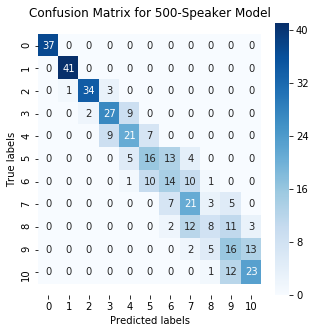

In [35]:
y_true = data500['y_true']
y_pred = data500['y_pred']

cm_train = confusion_matrix(y_true, y_pred, labels=range(11))

# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.set_facecolor('white')


# Plot confusion matrix for training data
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax, cmap="Blues")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for 500-Speaker Model')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig("confusion_500.png")
plt.show() # ta-da!




In [36]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("MAE: {}".format(mae(y_true, y_pred)))
print("MAE St.Dev.: {}".format(statistics.stdev(abs(y_true.astype(np.float)-y_pred.astype(np.float)))))
print("Relative MAE: {}".format(np.mean(abs(y_true-y_pred)/ (y_pred+0.00001))))
print("Relative MAE St.Dev.: {}".format(statistics.stdev( abs(y_true-y_pred)/ (y_pred+0.00001) )))

MAE: 0.4156479217603912
MAE St.Dev.: 0.5801872865737389
Relative MAE: 0.07169619299803857
Relative MAE St.Dev.: 0.11379483896360802


In [37]:
# results = abs(y_true-y_pred)
# for r in results:
#     with open('results.csv','a') as fd:
#         writer = csv.writer(fd)
#         writer.writerow([r, '500 Speakers'])

In [38]:
results = abs(y_true-y_pred)/ (y_pred+0.00001)

for r in results:
    with open('results_relative.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow([r, '500 Speakers'])

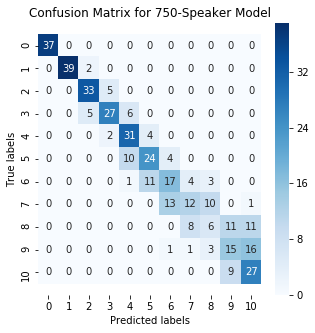

In [39]:
y_true = data750['y_true']
y_pred = data750['y_pred']

cm_train = confusion_matrix(y_true, y_pred, labels=range(11))

# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.set_facecolor('white')


# Plot confusion matrix for training data
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax, cmap="Blues")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for 750-Speaker Model')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig("confusion_750.png")
plt.show() # ta-da!


In [40]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("MAE: {}".format(mae(y_true, y_pred)))
print("MAE St.Dev.: {}".format(statistics.stdev(abs(y_true.astype(np.float)-y_pred.astype(np.float)))))
print("Relative MAE: {}".format(np.mean(abs(y_true-y_pred)/ (y_pred+0.00001))))
print("Relative MAE St.Dev.: {}".format(statistics.stdev( abs(y_true-y_pred)/ (y_pred+0.00001) )))

MAE: 0.39364303178484106
MAE St.Dev.: 0.5891658108321721
Relative MAE: 0.0669042259430424
Relative MAE St.Dev.: 0.10984922658566777


In [41]:
# results = abs(y_true-y_pred)
# for r in results:
#     with open('results.csv','a') as fd:
#         writer = csv.writer(fd)
#         writer.writerow([r, '750 Speakers'])

In [42]:
results = abs(y_true-y_pred)/ (y_pred+0.00001)

for r in results:
    with open('results_relative.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow([r, '750 Speakers'])